In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.utils as vutils
import matplotlib.pyplot as plt
import numpy as np

In [4]:
latent_dim = 100

In [5]:
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.ConvTranspose2d(latent_dim, 512, kernel_size=4, stride=1, padding=0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 3, kernel_size=4, stride=2, padding=1, bias=False),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)


In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
generator = Generator(latent_dim).to(device)

In [12]:
generator.load_state_dict(torch.load('generator_cifar.pth'))

<All keys matched successfully>

In [14]:
# Set random seed for reproducibility
torch.manual_seed(42)

In [15]:
# Sample two random latent vectors z1 and z2
z1 = torch.randn(1, latent_dim, 1, 1)  # Latent vector z1 (shape depends on your GAN architecture)
z2 = torch.randn(1, latent_dim, 1, 1)  # Latent vector z2


In [16]:
# Perform linear interpolation between z1 and z2
steps = 10  # Number of interpolation steps
interpolated_images = []

In [18]:

for t in np.linspace(0, 1, steps):
    z_interpolated = (1 - t) * z1 + t * z2
    z_interpolated = z_interpolated.to(device)
    with torch.no_grad():  # Disable gradient computation
        generated_image = generator(z_interpolated)
    interpolated_images.append(generated_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99999934..0.999983].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999994..0.9999707].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99999964..0.99998635].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999995..0.9999679].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999981..0.9996886].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999946..0.999719].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99992

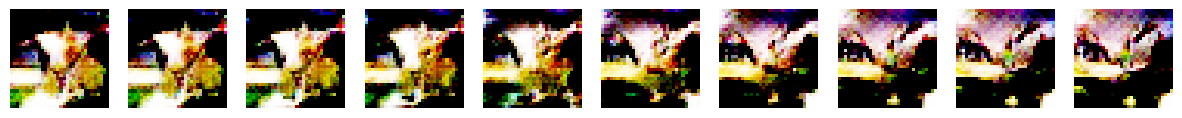

In [19]:

# Visualize the results
fig, axes = plt.subplots(1, steps, figsize=(15, 5))
for i, img in enumerate(interpolated_images):
    axes[i].imshow(img.squeeze().permute(1, 2, 0).cpu().numpy())
    axes[i].axis('off')

plt.show()
